# Proyek Analisis Data: E-commerce public dataset
- **Nama:** Dwi Reza Ariyadi
- **Email:** rezaariyadi8@gmail.com
- **ID Dicoding:** MC269D5Y0343

## Menentukan Pertanyaan Bisnis

Proyek analisis ini bertujuan untuk menjawab pertanyaan bisnis berikut :

1. Bagaimana pola transaksi penjualan pada beberapa tahun terakhir berdasarkan jumlah pesanan dan total pendapatan bulanan?
2. Produk kategori apa yang memiliki total penjualan tertinggi dan terendah dalam rentang tahun 2016-2018
3. Bagaimana distribusi status pesanan (delivered, canceled, shipped) dari tahun 2016 hingga 2018, dan apakah ada tren perubahan setiap tahunnya?
4. Bagaimana hubungan antara waktu pemesanan (jam dan hari dalam seminggu) dengan tingkat pembatalan pesanan selama periode 2016-2018?
5. Berapa persentase pesanan yang dibatalkan berdasarkan metode pembayaran (misalnya, kartu kredit, transfer bank, dompet digital) pada tahun 2016-2018, dan metode pembayaran mana yang memiliki tingkat pembatalan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [130]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [131]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [132]:
payment_df = pd.read_csv('order_payments_dataset.csv')
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [133]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [134]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [135]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [136]:
products_df = products_df.merge(product_category_name_translation_df, on='product_category_name', how='left')

products_df['product_category_name'] = products_df['product_category_name_english']

products_df.drop(columns=['product_category_name_english'], inplace=True)

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- tabel `orders_df` berisi data pesanan yang dilakukan pelanggan beserta keterangan waktu yang dapat kita gunakan untuk analisis berdasarkan tahun
- tabel `order_items_df` memberikan informasi terkait dengan product beserta harganya
- tabel `customers_df` memberikan informasi terkait dengan wilayah pesanan
- parameter yang ada pada masing masing tabel telah sesuai dengan pertanyaan bisnis yang akan dicapai

### Assessing Data

#### Menilai tabel orders_df

In [137]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [138]:
orders_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [139]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [140]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### menilai tabel payment_df

In [141]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [142]:
payment_df.nunique()

,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [143]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel order_item_df

In [144]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [145]:
order_items_df.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [146]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [147]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `customers_df`

In [148]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [149]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [150]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [151]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `products_df`



In [152]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [153]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [154]:
products_df.nunique()

,0
product_id,32951
product_category_name,71
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


In [155]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


In [156]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Dataset yang digunakan tidak memiliki duplicate value
- Terdapat kolom waktu yang bertipe data object, hal ini perlu dilakukan perbaikan menjadi datetime agar proses analisis dpat dilakukan

### Cleaning Data

#### Data Duplicate
  Berdasarkan proses assessing yang telah dilakukan tidak ada data duplikat untuk masing-masing tabel

#### Perbaikan Tipe Data

In [157]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [158]:
convert_to_datetime = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date",
                       "order_delivered_customer_date","order_estimated_delivery_date"]

for column in convert_to_datetime:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [159]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Missing Value

In [160]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [161]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [162]:
filtered_orders = orders_df[orders_df['order_approved_at'].isna()]

unique_order_status = filtered_orders['order_status'].unique()
print(unique_order_status)

['canceled' 'delivered' 'created']


In [163]:
delivered_without_approval = orders_df[(orders_df['order_status'] == 'delivered') &
                                       (orders_df['order_approved_at'].isna())]
delivered_without_approval

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [164]:
# Pastikan kolom bertipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

# Hitung selisih waktu (dalam jam) antara purchase dan approved untuk data yang tidak NaN
time_diff = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 3600

# Hitung rata-rata selisih waktu
avg_time_diff_hours = time_diff.mean()

print(f"Rata-rata selisih waktu (jam): {avg_time_diff_hours:.2f}")

# Isi NaN dengan order_purchase_timestamp + rata-rata waktu
orders_df['order_approved_at'].fillna(
    orders_df['order_purchase_timestamp'] + pd.to_timedelta(avg_time_diff_hours, unit='h'),
    inplace=True
)

# Cek apakah masih ada NaN
print(orders_df['order_approved_at'].isna().sum())

Rata-rata selisih waktu (jam): 10.42
0


<ipython-input-164-50893140a50a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(


In [165]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18.000000000,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30.000000000,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486912,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486912,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [166]:
filtered_orders = orders_df[orders_df['order_delivered_customer_date'].isna()]

unique_order_status = filtered_orders['order_status'].unique()
print(unique_order_status)

['invoiced' 'shipped' 'processing' 'unavailable' 'canceled' 'delivered'
 'created' 'approved']


In [167]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000000000,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05.000000000,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486912,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486912,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [168]:
filtered_orders = orders_df[orders_df['order_delivered_customer_date'].isna()]

unique_order_status = filtered_orders['order_status'].unique()
print(unique_order_status)

['invoiced' 'shipped' 'processing' 'unavailable' 'canceled' 'delivered'
 'created' 'approved']


In [169]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [170]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


#### Handling Data Inacurate

In [171]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [172]:
print(f"Payment Kategori :{payment_df['payment_type'].unique()}")

Payment Kategori :['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


Cari tahu pesanan yang mengalami payment_type inaccurate

In [173]:
inaccurate_df = orders_df.merge(payment_df, on='order_id', how='left')
inaccurate_df = inaccurate_df[inaccurate_df['payment_type'] == 'not_defined']
inaccurate_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
1175,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-29 01:51:47.739486912,NaT,NaT,2018-09-12,1.0,not_defined,1.0,0.0
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,2018-09-04 00:39:33.739486912,NaT,NaT,2018-09-10,1.0,not_defined,1.0,0.0
42113,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,2018-08-29 06:30:22.739486912,NaT,NaT,2018-09-11,1.0,not_defined,1.0,0.0


terdapat 3 order yang mengalami inaccurate pada `order_df` dengan `order_status : canceled`. Dengan Id sebagai berikut:

In [174]:
not_defined_orders = payment_df[payment_df['payment_type'] == 'not_defined']['order_id']
not_defined_orders.head()

,order_id
51280,4637ca194b6387e2d538dc89b124b0ee
57411,00b1cb0320190ca0daa2c88b35206009
94427,c8c528189310eaa44a745b8d9d26908b


Dilakukan penghapusan dikarenakan tidak bermanfaat bahkan mengacaukan proses analisis

In [175]:
print(f"Jumlah data orders_df sebelum penghapusan  : {len(orders_df)}")
print(f"Jumlah data payment_df sebelum penghapusan : {len(payment_df)}")

orders_df.drop(orders_df[orders_df['order_id'].isin(not_defined_orders)].index, inplace=True)
payment_df.drop(payment_df[payment_df['payment_type'] == 'not_defined'].index, inplace=True)

print(f"Jumlah data orders_df setelah penghapusan  : {len(orders_df)}")
print(f"Jumlah data payment_df setelah penghapusan : {len(payment_df)}")
print("---- Sukses melakukan penghapusan! ----")

Jumlah data orders_df sebelum penghapusan  : 99441
Jumlah data payment_df sebelum penghapusan : 103886
Jumlah data orders_df setelah penghapusan  : 99438
Jumlah data payment_df setelah penghapusan : 103883
---- Sukses melakukan penghapusan! ----


**Insight:**
- dataset telah bersih dari duplicate value

- setelah dilakuan perubahan type data ke datetime terdapat missing value pada tipe data waktu

- terdapat missing value pada kolom `order_approved_at` , `order_delivered_carrier_date` dan `order_delivered_customer_date` hal ini wajar dikarenakan keterkaitan tanggal dengan status pesanan yang canceled sehingga tidak memiliki data waktu tersebut jadi tidak dapat dihapus karena akan mengakibatkan kehilangan informasi.

- nilai nan pada kolom `order_approved_at` dengan status `delivered` merupakan anomali karena tidak mungkin pesanan sudah dikirim tapi tidak ada tanggal approved nya. Diputuskan untuk melakukan imputation untuk mengisi nilai yang hilang dengan cara menghitung rata rata waktu yang dibutuhkan dari purchase dibuat sampai ke orrder di approved pada data yang normal.

- terdapat order yang tipe pembayarannya `not_defined` dengan  `status_order : canceled` sehingga diputuskan untuk melakukan droping.

## Exploratory Data Analysis (EDA)

### Explore orders_df


In [176]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [177]:
print(f"Kategori : '{orders_df['order_status'].unique()}")

Kategori : '['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [178]:
orders_df[orders_df['order_status']=='unavailable'].count()

,0
order_id,609
customer_id,609
order_status,609
order_purchase_timestamp,609
order_approved_at,609
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,609


In [179]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99438,99438,99438,99438,99438,97658,96476,99438
unique,99438,99438,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:32:41.112632832,2017-12-31 18:57:49.852119808,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 02:58:38.542207232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:42:12.249999872,2017-09-12 21:46:52,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 22:58:00,2018-01-19 11:45:21.500000,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:29:57.249999872,2018-05-04 23:34:50.500000,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-18 03:55:26.739486912,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [180]:
orders_df.groupby(by="order_status").customer_id.count()

,customer_id
order_status,
approved,2
canceled,622
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


### Explore Payment

In [181]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [182]:
print(f"Payment Kategori :{payment_df['payment_type'].unique()}")

Payment Kategori :['credit_card' 'boleto' 'voucher' 'debit_card']


In [183]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853402,154.104831
std,NaN,0.706594,NaN,2.687071,217.495628
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


### Explore Payment & Orders

In [184]:
orders_df = pd.merge(
    left=orders_df,
    right=payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


### Explore customer

In [185]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [186]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [187]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
31976,2683f227b4ca959e6183a3ebbd98b3d4,e88baae856b093e436aef60537fa28d8,91787,porto alegre,RS
43143,5a9b4246a7ab1a2994158a7f5d0e5a17,c8d499fd34360bfb33eb2d7dab386445,7056,guarulhos,SP
26371,a1a779486ad5e2f9deb27e850219d330,3c94a6c053908c75d5b8d9e8f65d49be,32113,contagem,MG
93843,d7c6202c81ea8e87b8c1afca9081081d,da2026f844d8833800d5ab729cf212b2,20550,rio de janeiro,RJ
93557,7f0f4bcffd7d9085eed3ad0a7814dd33,64bf6ad1486c8980c35a9a7a124a6aa1,14900,itapolis,SP


In [188]:
customers_df.groupby(by="customer_city").customer_id.count()

,customer_id
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


### Explore orders dan customers

In [189]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [190]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41743
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [191]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15537
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


### Explore order_item_df

In [192]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [193]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Explore products_df

In [194]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [195]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Explore products_df & order_item_df

In [196]:
sales_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [197]:
sales_product_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False)

,order_id
product_category_name,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449
...,...
arts_and_craftmanship,23
la_cuisine,13
cds_dvds_musicals,12


### Explore All Data

In [198]:
all_data_df = pd.merge(
    left=orders_customers_df,
    right=sales_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [199]:
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,118.70,22.76,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,159.90,19.22,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [200]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118431 entries, 0 to 118430
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118431 non-null  object        
 1   customer_id                    118431 non-null  object        
 2   order_status                   118431 non-null  object        
 3   order_purchase_timestamp       118431 non-null  datetime64[ns]
 4   order_approved_at              118431 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118431 non-null  datetime64[ns]
 8   payment_sequential             118428 non-null  float64       
 9   payment_type                   118428 non-null  object        
 10  payment_installments           118428 non-null  float64       
 11  

In [201]:
all_data_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

,price
product_category_name,
health_beauty,1297490.77
watches_gifts,1253143.30
bed_bath_table,1092551.02
sports_leisure,1023996.34
computers_accessories,942277.57
...,...
flowers,1110.04
home_comfort_2,773.17
cds_dvds_musicals,730.00


In [202]:
all_data_df['month'] = all_data_df['order_purchase_timestamp'].dt.to_period('M')
all_data_df.groupby('month')['order_id'].count()

,order_id
month,
2016-09,7
2016-10,397
2016-12,1
2017-01,1017
2017-02,2112
2017-03,3223
2017-04,2869
2017-05,4436
2017-06,3812


In [203]:
all_data_df.groupby('customer_state').agg({
    'order_id': 'count',
    'price': 'mean'
}).rename(columns={'order_id': 'total_orders', 'price': 'avg_spent'}).sort_values('total_orders', ascending=False,)

,total_orders,avg_spent
customer_state,,
SP,49964,109.913489
RJ,15420,124.849231
MG,13738,120.225607
RS,6521,121.457066
PR,6017,118.392565
SC,4328,125.108194
BA,4071,133.747826
DF,2489,126.594444
GO,2443,127.503794


In [204]:
all_data_df.groupby('customer_city').agg({
    'order_id': 'count',
    'price': 'mean'
}).rename(columns={'order_id': 'total_orders', 'price': 'avg_spent'}).sort_values('total_orders', ascending=False,)

,total_orders,avg_spent
customer_city,,
sao paulo,18735,108.028746
rio de janeiro,8252,125.666403
belo horizonte,3272,113.021660
brasilia,2473,127.095877
curitiba,1820,120.802913
...,...,...
salto do itarare,1,259.900000
icaraima,1,27.900000
icatu,1,778.000000


In [205]:
all_data_df['order_year'] = all_data_df['order_purchase_timestamp'].dt.year

# Group by customer_city dan order_year lalu agregasi
city_year_stats = all_data_df.groupby(['customer_city', 'order_year']).agg({
    'order_id': 'count',  # jumlah pesanan
    'price': 'mean'       # rata-rata pengeluaran
}).rename(columns={'order_id': 'total_orders', 'price': 'avg_spent'}).sort_values('total_orders', ascending=False)

city_year_stats

total_orders   avg_spent
customer_city       order_year                          
sao paulo           2018               10858  107.819987
                    2017                7835  108.376056
rio de janeiro      2018                4150  122.740889
                    2017                4049  128.218008
belo horizonte      2018                1819  115.582141
...                                      ...         ...
leoberto leal       2017                   1   24.990000
leopoldo de bulhoes 2017                   1  283.020000
leopolis            2018                   1   18.900000
liberato salzano    2018                   1   12.990000
zortea              2018                   1   69.900000

[6746 rows x 2 columns]

In [206]:
# Tambahkan kolom tahun dari order_purchase_timestamp
all_data_df['order_year'] = all_data_df['order_purchase_timestamp'].dt.year

# Group by customer_city dan order_year lalu hitung jumlah pesanan
city_year_stats = all_data_df.groupby(['order_year', 'customer_city']).agg({
    'order_id': 'count'
}).rename(columns={'order_id': 'total_orders'}).reset_index()

# Ambil top 5 kota berdasarkan jumlah pesanan tiap tahun
top5_cities_by_year = city_year_stats.sort_values(['order_year', 'total_orders'], ascending=[True, False])

# Dapatkan top 5 tiap tahun
top5_each_year = top5_cities_by_year.groupby('order_year').head(5)

# Tampilkan hasil
print('--- Top 5 city with highest order by year ----')
print(top5_each_year)


--- Top 5 city with highest order by year ----
      order_year   customer_city  total_orders
124         2016  rio de janeiro            53
155         2016       sao paulo            42
18          2016  belo horizonte            15
53          2016        curitiba            12
29          2016        campinas            11
3056        2017       sao paulo          7835
2702        2017  rio de janeiro          4049
530         2017  belo horizonte          1438
612         2017        brasilia          1084
2561        2017    porto alegre           826
6329        2018       sao paulo         10858
5976        2018  rio de janeiro          4150
3837        2018  belo horizonte          1819
3920        2018        brasilia          1381
4386        2018        curitiba          1029


In [207]:
all_data_df.to_csv("all_data.csv", index=False)

**Insight:**
- status dalam order memiliki kategori: 'delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved'
- Datataset ini lebih mempresentasikan E-comerce public di benua amerika
- Kota sao paulo merupakan top order   

## Visualization & Explanatory Analysis

In [208]:
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,2018-08,2018


### Pertanyaan 1: Bagaimana pola transaksi berdasarkan jumlah pesanan dan total pendapatan bulanan?

Menambah kolom tahun dan bulan

In [209]:
all_data_df['order_year'] = all_data_df['order_purchase_timestamp'].dt.year
all_data_df['order_month'] = all_data_df['order_purchase_timestamp'].dt.month

Menghitung jumlah pesanan dan total pendapatan per bulan dan tahun

In [210]:
monthly_sales = all_data_df.groupby(['order_year', 'order_month']).agg({
    'order_id': 'count',
    'price': 'sum'
}).rename(columns={'order_id': 'total_orders', 'price': 'total_sales'}).reset_index()

Pada Tahun 2017 dataset memiliki kelengkapan bulan yang dapat menggambarkan pola dalam setahun dengan baik. untuk itu kita akan fokus pada tahun tersebut untuk mendapatkan gambaran secara utuh.

In [211]:
data_2017 = all_data_df[all_data_df['order_year'] == 2017]

monthly_sales_2017 = data_2017.groupby('order_month').agg({
    'order_id': 'count'
}).rename(columns={'order_id': 'total_orders'}).reset_index()

print(monthly_sales_2017)

    order_month  total_orders
0             1          1017
1             2          2112
2             3          3223
3             4          2869
4             5          4436
5             6          3812
6             7          4902
7             8          5223
8             9          5149
9            10          5635
10           11          9111
11           12          6616


In [212]:
monthly_revenue_2017 = data_2017.groupby('order_month').agg({
    'order_id': 'count'
}).rename(columns={'order_id': 'total_orders'}).reset_index()

print(monthly_revenue_2017)

    order_month  total_orders
0             1          1017
1             2          2112
2             3          3223
3             4          2869
4             5          4436
5             6          3812
6             7          4902
7             8          5223
8             9          5149
9            10          5635
10           11          9111
11           12          6616


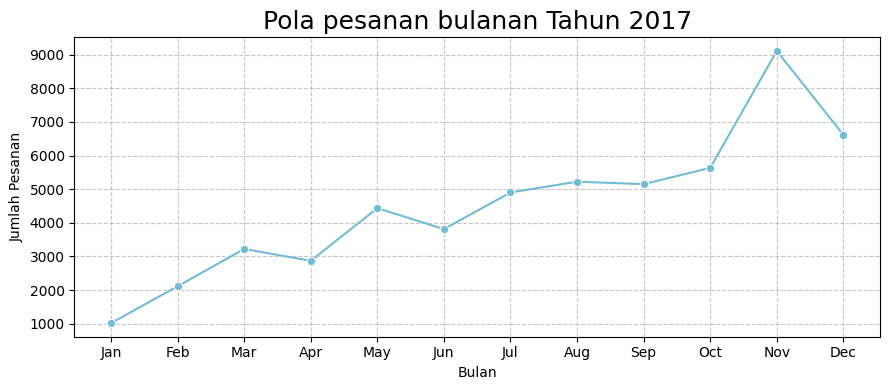

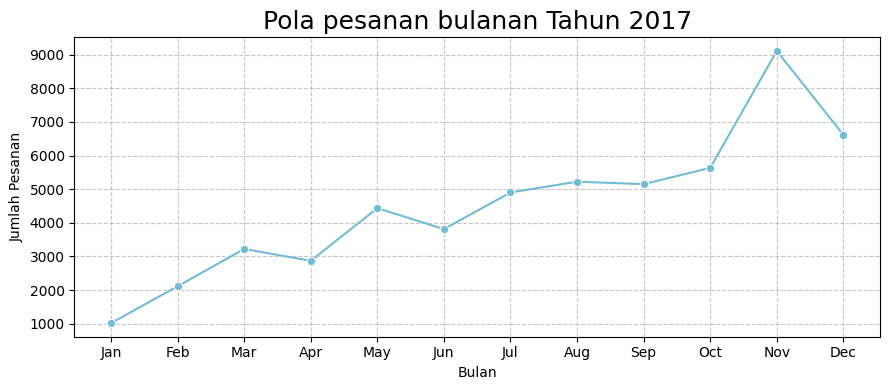

In [213]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=monthly_sales_2017, x='order_month', y='total_orders', marker='o', color='#72BCD4')
plt.title('Pola pesanan bulanan Tahun 2017', fontsize=18)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(9,4))
sns.lineplot(data=monthly_revenue_2017, x='order_month', y='total_orders', marker='o', color='#72BCD4')
plt.title('Pola pesanan bulanan Tahun 2017', fontsize=18)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Aktivitas transaksi menunjukkan tren peningkatan bertahap sepanjang tahun, dimulai dari Januari dengan 1.017 pesanan dan mencapai puncaknya pada November 2017 dengan 9.111 pesanan. Bulan November menjadi periode transaksi tertinggi, kemungkinan dipengaruhi oleh event besar, sementara Desember juga mencatat angka kuat terkait musim belanja akhir tahun. Meski ada lonjakan di bulan-bulan tertentu, pertengahan tahun (Mei-Oktober) menunjukkan stabilitas dengan jumlah pesanan berkisar antara 4.436 hingga 5.635 dan pendapatan rata-rata 500.000-700.000. Ini mengindikasikan bahwa aktivitas transaksi berlangsung secara konsisten sepanjang tahun, tidak hanya bergantung pada momen tertentu.

- Peningkatan Bertahap Sepanjang Tahun:
  - Aktivitas transaksi diawali dengan 1.017 pesanan pada bulan Januari, menghasilkan pendapatan sebesar 128.637,99.
  - Jumlah pesanan terus meningkat secara konsisten setiap bulan, mencapai puncaknya pada November 2017 dengan 9.111 pesanan dan pendapatan 1.046.127,84.

- Bulan dengan Transaksi Tertinggi:
  - November 2017 menjadi bulan dengan aktivitas tertinggi, baik dari segi jumlah pesanan maupun pendapatan. Hal ini kemungkinan besar dipengaruhi oleh adanya event besar.
  - Desember juga mencatat angka yang kuat, dengan 6.616 pesanan dan pendapatan 770.656,15, yang bisa dikaitkan dengan musim belanja akhir tahun.

- Stabilitas di Pertengahan Tahun:
  - Dari Mei hingga Oktober, jumlah pesanan terpantau stabil di kisaran 4.436 hingga 5.635 pesanan per bulan, dengan pendapatan rata-rata sekitar 500.000-700.000.
  - Ini menunjukkan bahwa aktivitas transaksi tidak hanya terpusat pada bulan-bulan tertentu, melainkan tetap kuat di pertengahan tahun.


### Pertanyaan 2: Produk kategori apa yang memiliki total penjualan tertinggi dan terendah dalam rentang tahun 2016-2018

In [214]:
sales_byproduct = all_data_df.groupby('product_category_name', as_index=False).agg(
    total_sales=('price', 'sum')
).sort_values(by='total_sales', ascending=False)

# Mengambil 5 kategori dengan penjualan terbanyak
top_categories = sales_byproduct.head(5)

# Mengambil 5 kategori dengan penjualan paling sedikit
bottom_categories = sales_byproduct.tail(5)

<ipython-input-215-b0995c48921f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-215-b0995c48921f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


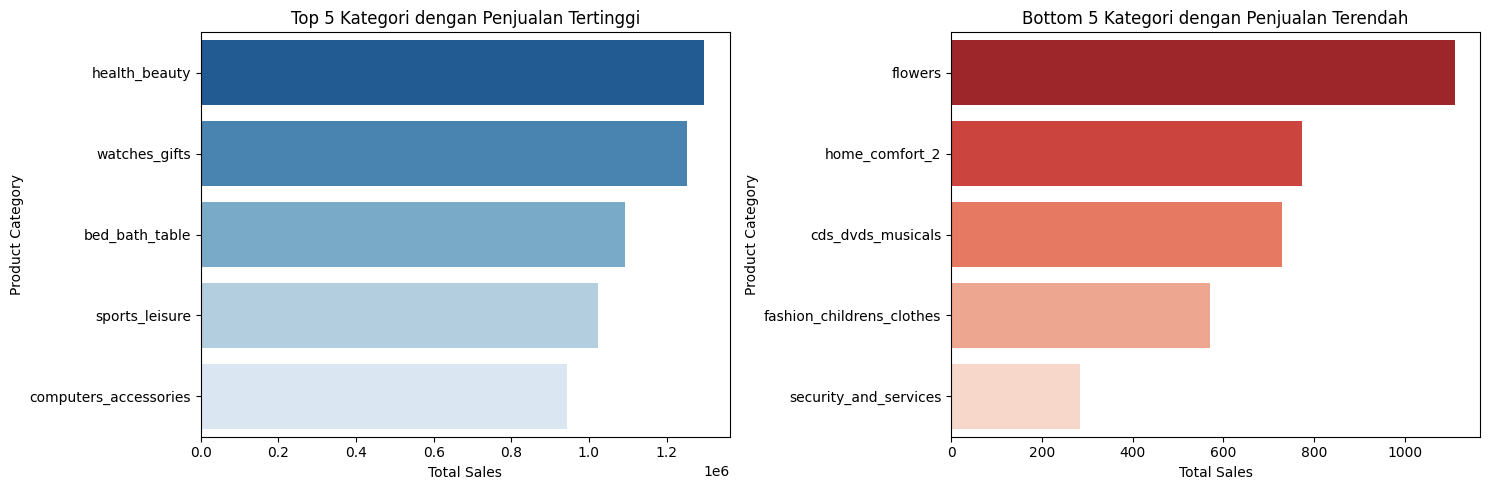

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(
    data=top_categories,
    x='total_sales',
    y='product_category_name',
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title("Top 5 Kategori dengan Penjualan Tertinggi")
axes[0].set_xlabel("Total Sales")
axes[0].set_ylabel("Product Category")

sns.barplot(
    data=bottom_categories,
    x='total_sales',
    y='product_category_name',
    palette='Reds_r',
    ax=axes[1]
)
axes[1].set_title("Bottom 5 Kategori dengan Penjualan Terendah")
axes[1].set_xlabel("Total Sales")
axes[1].set_ylabel("Product Category")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight :**
- Health & Beauty dan Watches & Gifts memiliki penjualan tertinggi, menunjukkan minat tinggi pada produk kecantikan dan hadiah.
- Security &  fashion_childrens_clothes memiliki penjualan terendah, menandakan permintaan rendah, kemungkinan tergantikan oleh layanan digital.

### Pertanyaan 3: Bagaimana distribusi status pesanan (delivered, canceled, shipped) dari tahun 2016 hingga 2018, dan apakah ada tren perubahan setiap tahunnya?

Disini kita akan melihat pesebaran/distribusi status pesanan dalam beberapa tahun terakhir.

In [216]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_year'] = orders_df['order_purchase_timestamp'].dt.year
order_status_yearly = orders_df.groupby(['order_year', 'order_status']).size().reset_index(name='count')
print(order_status_yearly)

    order_year order_status  count
0         2016     canceled     26
1         2016    delivered    284
2         2016     invoiced     18
3         2016   processing      2
4         2016      shipped     10
5         2016  unavailable      7
6         2017     approved      2
7         2017     canceled    290
8         2017      created      4
9         2017    delivered  45725
10        2017     invoiced    181
11        2017   processing    257
12        2017      shipped    573
13        2017  unavailable    493
14        2018     canceled    345
15        2018      created      1
16        2018    delivered  54748
17        2018     invoiced    126
18        2018   processing     60
19        2018      shipped    583
20        2018  unavailable    149


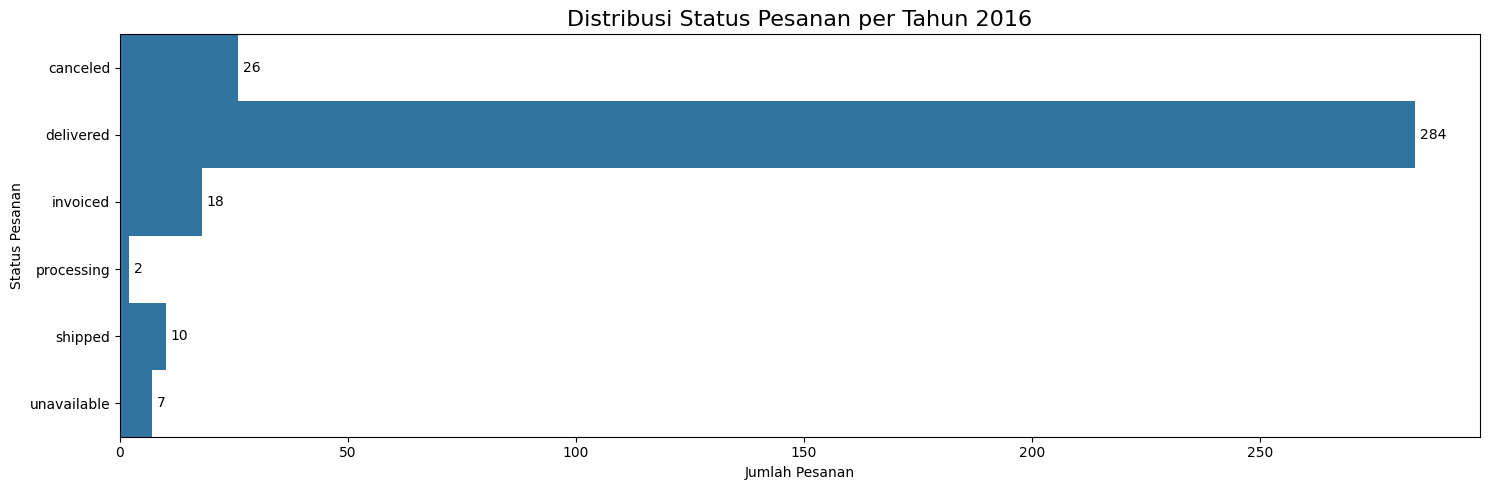

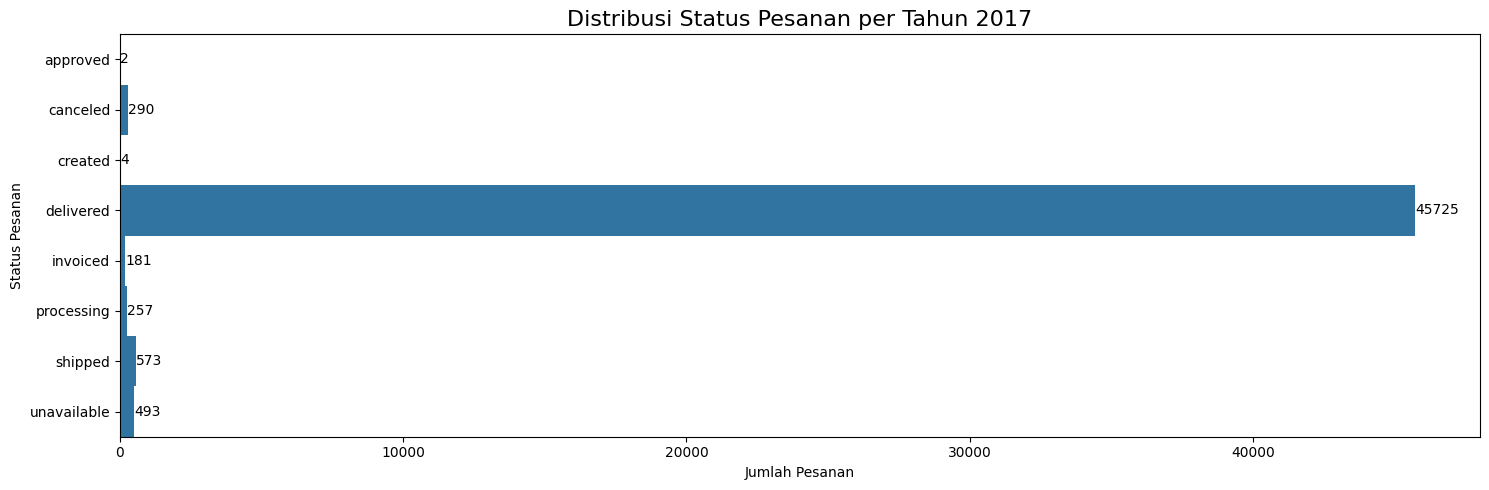

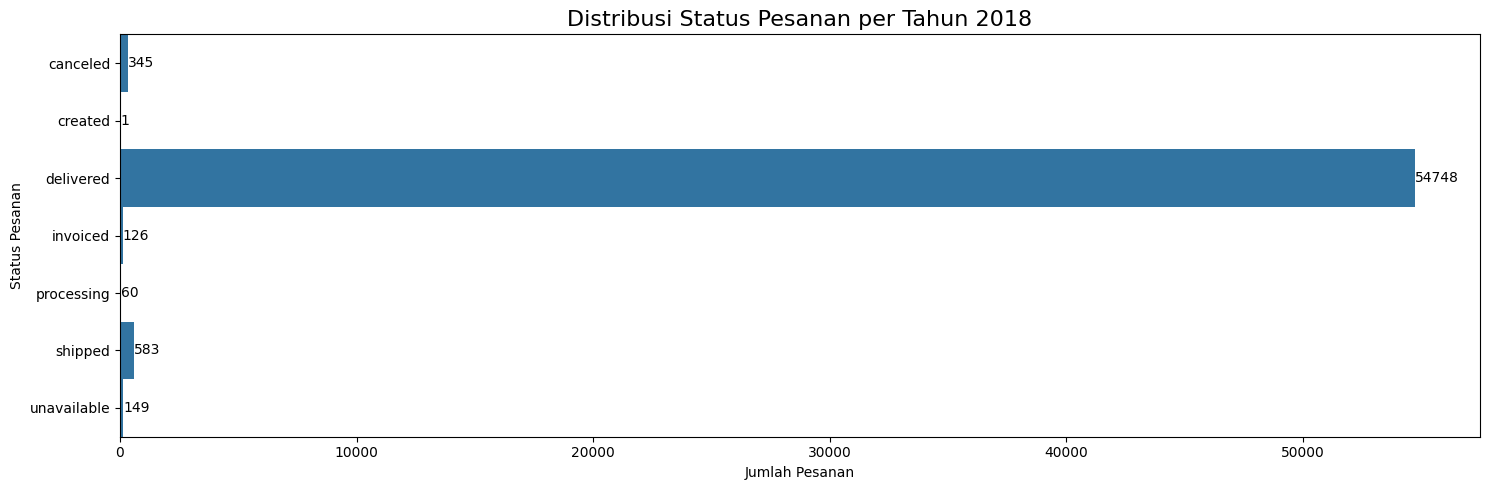

In [225]:
years = [2016, 2017, 2018]

for year in years:
    filtered_data = order_status_yearly[order_status_yearly['order_year'] == year]

    plt.figure(figsize=(15, 5))
    barplot = sns.barplot(
        data=filtered_data,
        x='count',
        y='order_status',
        orient="h",
        width=1.0
    )

    for bar, count in zip(barplot.patches, filtered_data['count']):
        plt.text(
            bar.get_width() + 1,
            bar.get_y() + bar.get_height() / 2,
            f'{int(count)}',
            color='black',
            ha='left',
            va='center'
        )

    plt.title(f'Distribusi Status Pesanan per Tahun {year}', fontsize=16)
    plt.xlabel('Jumlah Pesanan')
    plt.ylabel('Status Pesanan')

    plt.tight_layout()
    plt.show()

**Insight :**
- Kenaikan Jumlah Pesanan Tiap Tahun: Setiap tahunnya terjadi peningkatan jumlah pesanan ini dapat menandakan peningkatan pelanggan yang meningkat serta kemajuan ekonomi
- Distribusi Status Pesanan:
  - Delivered: Mendominasi status pesanan di ketiga tahun tersebut, yang menunjukkan bahwa sebagian besar pesanan berhasil dikirimkan.
  - Canceled: Meski lebih rendah dibanding status lainnya, jumlah pesanan yang dibatalkan tetap ada setiap tahunnya.
  - Shipped & Processing: Status ini juga terlihat stabil, merepresentasikan pesanan yang sedang dalam proses pengiriman atau persiapan.
-Tingkat canceled order:
  Setiap tahunnya canceled order terus mengalami peningkatan,penting untuk menggali lebih dalam terkait faktor yang menyebabkan canceled order


### Pertanyaan 4: Bagaimana hubungan antara waktu pemesanan (jam dan hari dalam seminggu) dengan tingkat pembatalan pesanan selama periode 2016-2018?

Untuk menjawab pertanyaan tersebut kita perlu mengukur canceled order pada satuan waktu hari dan jam. ini untuk memahami pola terjadinya canceled order sehinggan kita dapat mencari tahu hubungan yang terjadi.

In [218]:
all_data_df['order_hour'] = pd.to_datetime(all_data_df['order_purchase_timestamp']).dt.hour
all_data_df['order_day'] = pd.to_datetime(all_data_df['order_purchase_timestamp']).dt.day_name()

In [219]:
cancellation_by_hour = all_data_df.groupby('order_hour')['order_status'].value_counts().unstack().fillna(0)
cancellation_by_hour['cancellation_rate'] = (cancellation_by_hour['canceled'] /
                                              cancellation_by_hour.sum(axis=1)) * 100

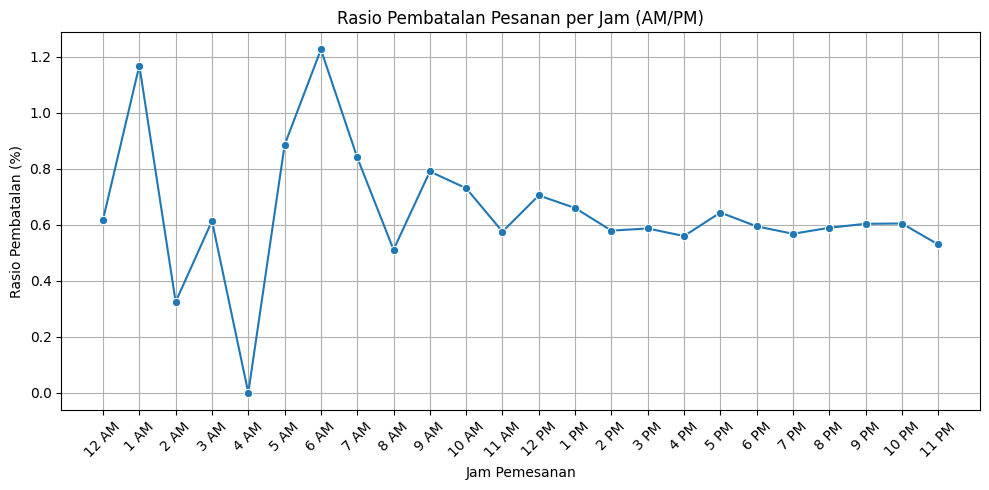

In [220]:
cancellation_by_hour = all_data_df.groupby('order_hour')['order_status'].value_counts().unstack().fillna(0)
cancellation_by_hour['cancellation_rate'] = (cancellation_by_hour['canceled'] /
                                              cancellation_by_hour.sum(axis=1)) * 100

plt.figure(figsize=(10, 5))
sns.lineplot(data=cancellation_by_hour, x=cancellation_by_hour.index, y='cancellation_rate', marker='o')

hours = [f'{h % 12 or 12}{" AM" if h < 12 else " PM"}' for h in range(24)]
plt.xticks(ticks=range(24), labels=hours,rotation=45)

plt.title('Rasio Pembatalan Pesanan per Jam (AM/PM)')
plt.xlabel('Jam Pemesanan')
plt.ylabel('Rasio Pembatalan (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight :**
- Lonjakan Pembatalan pada Jam Tertentu:
Rasio pembatalan cenderung meningkat pada rentang waktu 5-9 pagi dan 11- 1 malam. Hal ini mungkin berkaitan dengan aktivitas harian pelanggan, di mana pagi hari adalah waktu memulai aktivitas dan mungkin di penghujung malam merupakan penutupan sessi hingga terjadi penurunan layanan .

- Minim Pembatalan di Tengah Malam:
Rasio pembatalan terlihat lebih rendah pada dini hari hingga subuh (2-5 pagi). Ini sejalan dengan rendahnya aktivitas transaksi di jam-jam tersebut, mengingat sebagian besar pelanggan kemungkinan sedang beristirahat.

### Pertanyaan 5 : Berapa persentase pesanan yang dibatalkan berdasarkan metode pembayaran pada tahun 2016-2018, dan metode pembayaran mana yang memiliki tingkat pembatalan tertinggi?

untuk menjawab pertanyaan tersebut kita perlu menghitung total pesanan dan jumlah canceled untuk setiap payment method

In [221]:
payment_status = all_data_df.groupby(['payment_type']).agg(
    total_orders=('order_id', 'count'),
    canceled_orders=('order_status', lambda x: (x == 'canceled').sum())
).reset_index()

payment_status['cancellation_rate'] = (payment_status['canceled_orders'] / payment_status['total_orders']) * 100

print(payment_status)

  payment_type  total_orders  canceled_orders  cancellation_rate
0       boleto         23037              112           0.486174
1  credit_card         87286              508           0.581995
2   debit_card          1698                7           0.412250
3      voucher          6407              115           1.794912


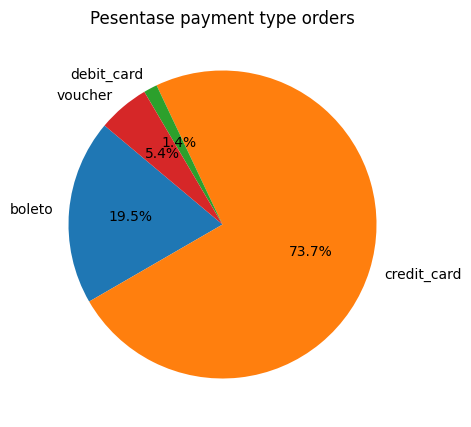

In [222]:
# Pie chart
plt.figure(figsize=(7, 5))
plt.pie(payment_status['total_orders'],
        labels=payment_status['payment_type'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab10.colors)

# Title
plt.title('Pesentase payment type orders')
plt.show()

Sebagian besar pelanggan menggunakan *credit card* dalam pembuatan ordernya dengan persentase **73.7%** kemudian ada boleto **19.5%**, voucher **5.4%** dan debit_card **1.4%**

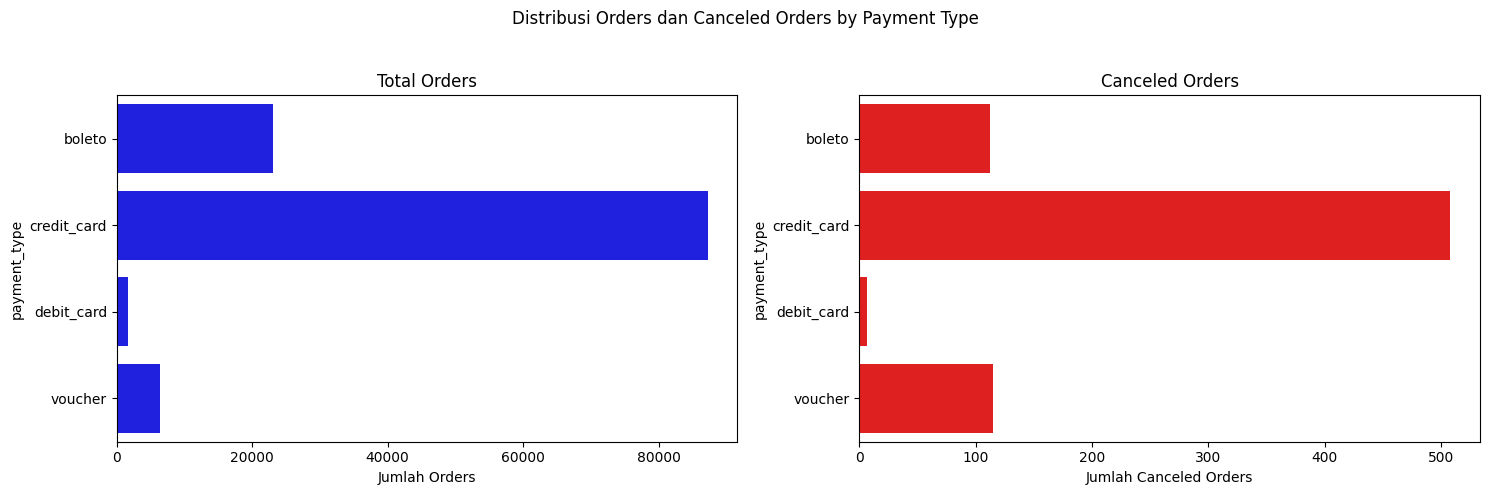

In [223]:
# Setup figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribusi Orders dan Canceled Orders by Payment Type')

# Plot Total Orders
sns.barplot(y=payment_status["payment_type"], x=payment_status["total_orders"], orient="h", color='blue', ax=axes[0])
axes[0].set_title("Total Orders")
axes[0].set_xlabel("Jumlah Orders")

# Plot Canceled Orders
sns.barplot(y=payment_status["payment_type"], x=payment_status["canceled_orders"], orient="h", color='red', ax=axes[1])
axes[1].set_title("Canceled Orders")
axes[1].set_xlabel("Jumlah Canceled Orders")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


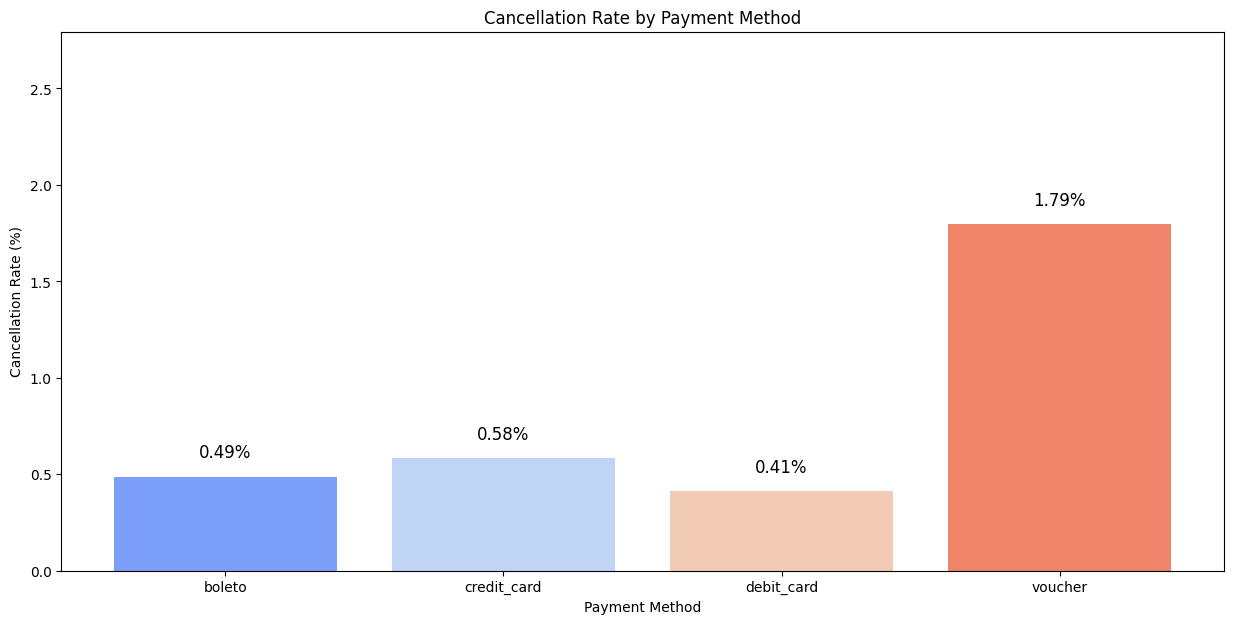

In [227]:
# Plot
plt.figure(figsize=(15, 7))
colors = sns.color_palette("coolwarm", len(payment_status))
bars = plt.bar(payment_status['payment_type'], payment_status['cancellation_rate'], color=colors)

# Anotasi persentase di atas bar
for bar, rate in zip(bars, payment_status['cancellation_rate']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{rate:.2f}%', ha='center', fontsize=12)

plt.title('Cancellation Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, max(payment_status['cancellation_rate']) + 1)
plt.show()

**Insight :**
Berdasarkan analasisis yang telah dilakukan terlihat adanya variasi rasio pembatalan berdasarkan metode pembayaran yang digunakan:

- Voucher memiliki rasio pembatalan tertinggi — sebesar 1.79%. Hal ini bisa mengindikasikan bahwa pelanggan yang menggunakan voucher cenderung membatalkan pesanan, kemungkinan karena adanya kendala teknis saat klaim, perubahan keputusan, atau ketentuan tertentu terkait penggunaan voucher.

- Credit card memiliki rasio pembatalan sebesar 0.58%. Meski tergolong rendah, angka ini lebih tinggi dibandingkan pembayaran melalui boleto atau debit card. Ini bisa disebabkan oleh proses otorisasi yang terkadang memakan waktu, membuat pelanggan berubah pikiran sebelum pembayaran selesai.

- Boleto mencatat rasio pembatalan sebesar 0.49%. Pembatalan pada metode ini bisa terkait degan pelanggan yang tidak segera menyelesaikan pembayaran setelah mendapatkan instruksi.

- Debit card memiliki rasio pembatalan terendah — hanya 0.41%. Ini menunjukkan bahwa transaksi debit biasanya dilakukan oleeh pelanggan yang lebih yakin dengan pembelian mereka, karena proses pembayaran umumnya langsung dikonfirmasi.

## Conclusion

Berdasakan pertanyaan bisnis yang telah didefinisikan di awal dan juga analisis yang  telah dilakukan, ditarik kesimpulan sebagai berikut :

- Transaksi menunjukkan peningkatan bertahap sepanjang tahun, dimulai dari 1.017 pesanan di Januari dan mencapai puncak pada November 2017 dengan 9.111 pesanan, kemungkinan karena event besar. Desember juga mencatat 6.616 pesanan, didorong oleh musim belanja akhir tahun. Meski ada lonjakan di bulan tertentu, transaksi tetap stabil dari Mei hingga Oktober, dengan pesanan berkisar antara 4.436-5.635 dan pendapatan rata-rata 500.000-700.000. Ini mencerminkan aktivitas transaksi yang konsisten sepanjang tahun, tidak bergantung pada momen tertentu.

- Health & Beauty dan Watches & Gifts memiliki penjualan tertinggi, menunjukkan minat tinggi pada produk kecantikan dan hadiah. Security &  fashion_childrens_clothes memiliki penjualan terendah, menandakan permintaan rendah, kemungkinan tergantikan oleh layanan digital.

- Terdapat tren positif dengan peningkatan jumlah pesanan setiap tahunnya, mengindikasikan pertumbuhan pelanggan dan potensi kemajuan ekonomi. Sebagian besar pesanan berhasil dikirimkan, terbukti dari dominasi status *Delivered* dalam tiga tahun terakhir. Meski begitu, perlu menjadi perhatian bahwa jumlah *canceled order* juga terus meningkat dari tahun ke tahun. Oleh karena itu, penting untuk melakukan analisis lebih dalam guna mengidentifikasi faktor-faktor penyebab pembatalan pesanan agar dapat meminimalisirnya di masa mendatang.

- Berdasarkan analisis rasio pembatalan, ditemukan pola yang jelas terkait waktu tertentu. Lonjakan pembatalan terjadi pada rentang waktu **5-9 pagi** dan **11 malam - 1 dini hari**, yang diduga berkaitan dengan aktivitas pelanggan — pagi hari sebagai awal aktivitas dan malam hari sebagai penutupan sesi layanan. Sementara itu, rasio pembatalan cenderung lebih rendah pada **2-5 pagi**, selaras dengan minimnya transaksi di jam-jam istirahat tersebut. Pola ini memberikan wawasan bagi pengelola layanan untuk mengantisipasi lonjakan pembatalan dan meningkatkan kualitas layanan pada jam-jam kritis tersebut.

- Analisis menunjukkan variasi rasio pembatalan berdasarkan metode pembayaran. *Voucher* memiliki rasio tertinggi (1.79%), diikuti *credit card* (0.58%), *boleto* (0.49%), dan *debit card* terendah (0.41%). Temuan ini dapat menjadi acuan untuk mengoptimalkan proses pembayaran, terutama terkait *voucher* dan *credit card*, guna mengurangi risiko pembatalan.